Task 1.1 : Changing contrast

Open the image file Raccon_gray.png. Increase the contrast of the image by changing the minimum and maximum values of the image array so that the 10% darkest pixels and 10% brightest pixels are in saturation, respectively (i.e., have values 0 and 255, respectively). Plot the original and the modified image next to each other. In a third image, draw the contour lines of the dark and bright thresholds on top of the original image.

Hint: Use scipy.stats.scoreatpercentile to find out the threshold values, and then linearly scale the intensities (i.e., image values) accordingly.

In [54]:
import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import skimage
from skimage import data 
from skimage import io


# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['ytick.major.pad'] = 4

plt.rcParams.update({'font.size' : 8})
font = {'fontsize'   : 8}
font1 = {'fontsize'   : 8}

In [55]:
import scipy.misc

In [56]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andres2085/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


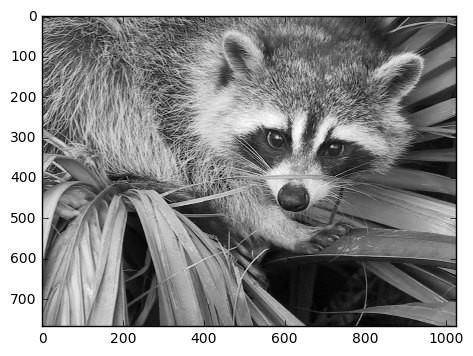

In [57]:
#1) open racoon_gray file from http://www.iup.uni-bremen.de/~hilboll/download/pdap-2016/racoon_gray.png
racoon_gray = io.imread('/home/andres2085/Downloads/racoon_gray.png', flatten=True)
plt.imshow(racoon_gray, cmap=plt.cm.gray);
plt.show()

In [58]:
#2)-- finding the minimum and maximum values of the image array
print(racoon_gray.min(), racoon_gray.max())

0.000833333333333 0.991583529412


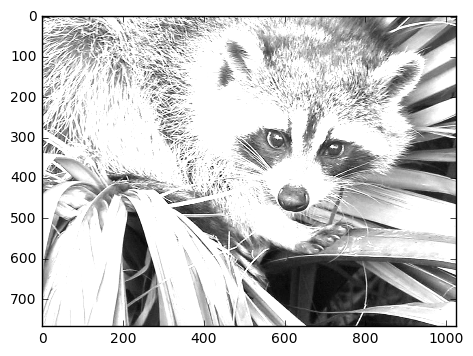

In [59]:
#3--- modyfing the image for vmin and vmax
plt.imshow(racoon_gray, cmap=plt.cm.gray, vmin=0, vmax=0.5);
plt.show()

In [60]:
#4)-- finding the threshold values
from scipy import stats
scipy.stats.scoreatpercentile(racoon_gray, per=100)

0.99158352941176475

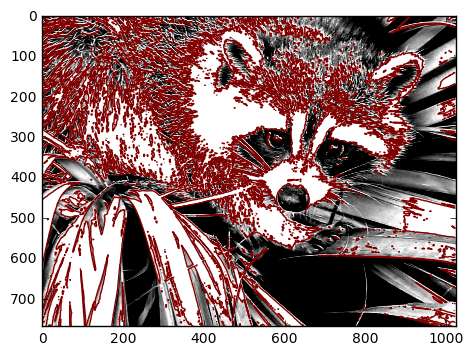

In [61]:
#5) racoon_gray using contour
img = plt.imshow(racoon_gray, cmap=plt.cm.gray, vmin=0.25, vmax=0.52)
plt.contour(racoon_gray, [0, 0.55])
plt.show()

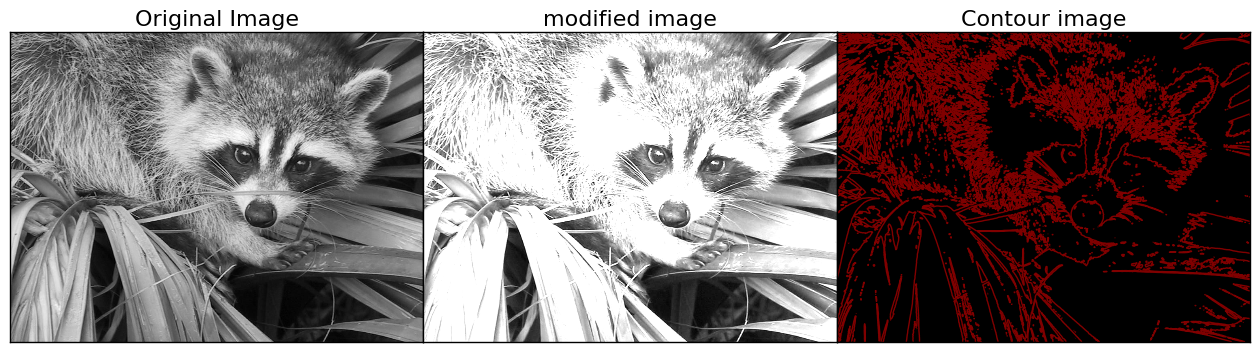

In [62]:
#6)--- Plotting racoon_gray(original, modify and contour) 

fig, ax = plt.subplots(1, 3, figsize=(16, 6),
subplot_kw=dict(xticks=[], yticks=[]));

fig.subplots_adjust(wspace=0.00);
ax[0].imshow(racoon_gray, cmap=plt.cm.gray)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(racoon_gray, cmap=plt.cm.gray, vmin=0, vmax=0.5)
ax[1].set_title('modified image', size=16);

ax[2].imshow(racoon_gray, cmap=plt.cm.gray, vmin=30, vmax=200)
ax[2].set_title('Contour image', size=16);
ax[2].contour(racoon_gray, [0, 0.50])
plt.show();

### Task 1.2: Converting color to grayscale

Open the image file racoon_color.png and convert it to grayscale using the *lightness*, *average*, and *luminosity* methods (see [here](https://docs.gimp.org/2.6/en/gimp-tool-desaturate.html) for their definitions).  Compare the results.

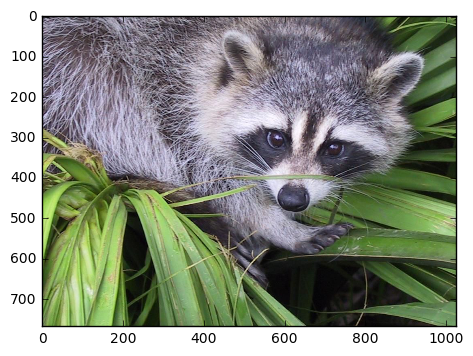

In [63]:
#1) open racoon_gray file racoon_color.png

#Gray = 0.299*'Red' + 0.587*'Green' + 0.114*'Blue'
racoon_color = io.imread('/home/andres2085/Downloads/racoon_gray.png', mode='Gray')
#L = R * 299/1000 + G * 587/1000 + B * 114/1000
plt.imshow(racoon_color);
plt.show()
#racoon_gray = im.convert('L')

In [64]:
#1) For lightness

In [65]:
def color2gray_lightness(racoon_color):
    if np.ndim(racoon_color) == 3:
        racoon_color_gray = (np.max(racoon_color.astype(np.int), axis=2) + np.min(racoon_color.astype(np.int), axis=2)) / 2.0
    elif np.ndim(racoon_color) == 2:
        racoon_color_gray = racoon_color
    else:
        raise NameError('The image isnt gray or color.')
    return racoon_color_gray

In [75]:
l_Ra = color2gray_lightness(racoon_color);
#plt.imshow(l_Ra);#, cmap=plt.cm.gray)#, vmin=0, vmax=250);
#plt.title('Racoon lightness');
#plt.show()

In [67]:
# 2) for average:

In [68]:
def color2gray_average(racoon_color):
    if np.ndim(racoon_color) == 3:
        racoon_color_gray = np.sum(racoon_color.astype(np.int), axis=2) / 3.0
    elif np.ndim(racoon_color) == 2:
        racoon_color_gray = racoon_color
    else:
        raise NameError('The image isnt gray or color.')
    return racoon_color_gray

In [69]:
def color2gray_average(racoon_color):
    if np.ndim(racoon_color) == 3:
        racoon_color_gray = np.sum(racoon_color.astype(np.int), axis=2) / 3.0
    elif np.ndim(racoon_color) == 2:
        racoon_color_gray = racoon_color
    else:
        raise NameError('The image isnt gray or color.')
    return racoon_color_gray

In [70]:
a_Ra = color2gray_average(racoon_color);
#plt.imshow(a_Ra)#, cmap=plt.cm.gray)#, vmin=0, vmax=250);
#plt.title('Racoon average');
#plt.show()

In [71]:
#3) luminosity

In [72]:
def color2gray_luminosity(racoon_color):
    if np.ndim(racoon_color) == 3:
        R = racoon_color[:,:,0]
        G = racoon_color[:,:,1]
        B = racoon_color[:,:,2]
        racoon_color_gray = 0.21*R + 0.71*G + 0.07*B
    elif np.ndim(racoon_color) == 2:
        racoon_color_gray = racoon_color
    else:
        raise NameError('The image isnt gray or color.')
    return racoon_color_gray

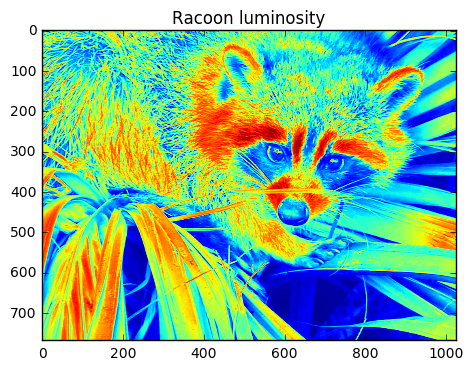

In [73]:
lu_Ra = color2gray_luminosity(racoon_color);
plt.imshow(lu_Ra)#, cmap=plt.cm.gray)#, vmin=0, vmax=250);
plt.title('Racoon luminosity')
#plt.show()

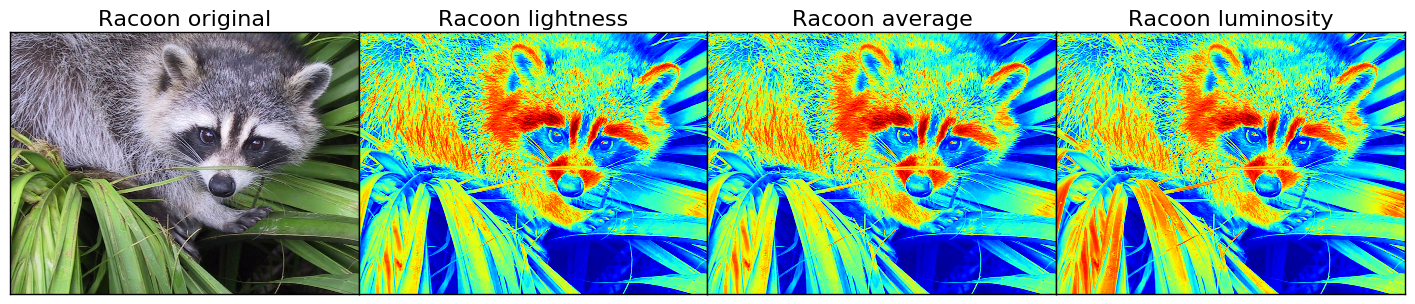

In [74]:
fig, ax = plt.subplots(1, 4, figsize=(18, 10),
subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.00)
ax[0].imshow(racoon_color)
ax[0].set_title('Racoon original', size=16)

ax[1].imshow(l_Ra)#, flatten=True)
ax[1].set_title('Racoon lightness', size=16);

ax[2].imshow(a_Ra)
ax[2].set_title('Racoon average', size=16);

ax[3].imshow(lu_Ra)
ax[3].set_title('Racoon luminosity', size=16);
plt.show();
